In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

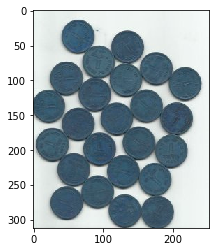

In [2]:
img = cv2.imread('coins.png')
plt.imshow(img)

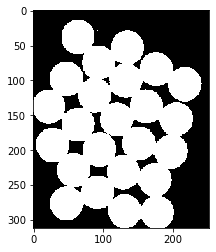

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh,'gray')

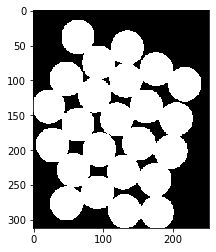

In [4]:
# Noise Removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening,'gray')

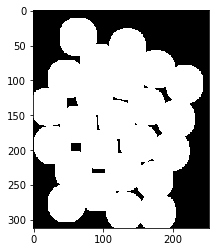

In [5]:
# Background area 
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg,'gray')

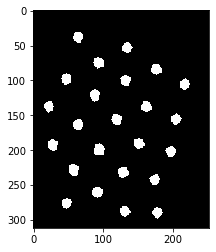

In [6]:
# Foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg,'gray')

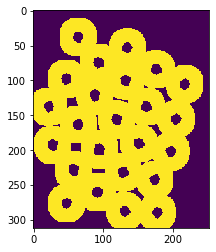

In [7]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown)

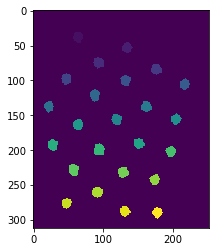

In [8]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

plt.imshow(markers)

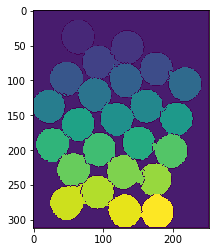

In [9]:
#Applying watershed algorithm and marking the regions segmented
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
plt.imshow(markers)

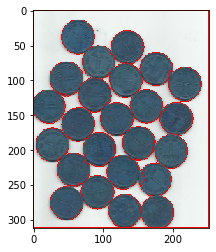

In [10]:
img[markers == -1] = [255,0,0]
plt.imshow(img)